# 3장. 신경망

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [ ]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [ ]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
y = y.astype(int)
y

array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

***ch03/step_function.py***

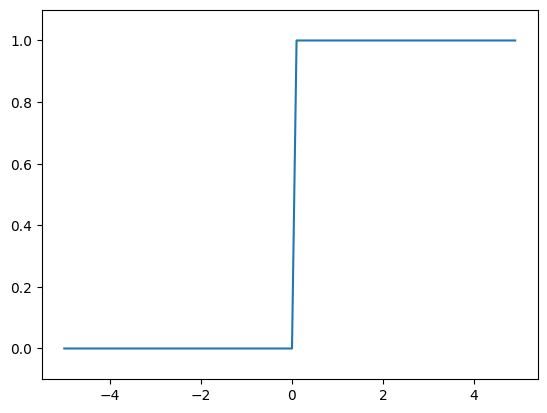

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

***ch03/sigmoid.py***

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

***ch03/sigmoid.py***

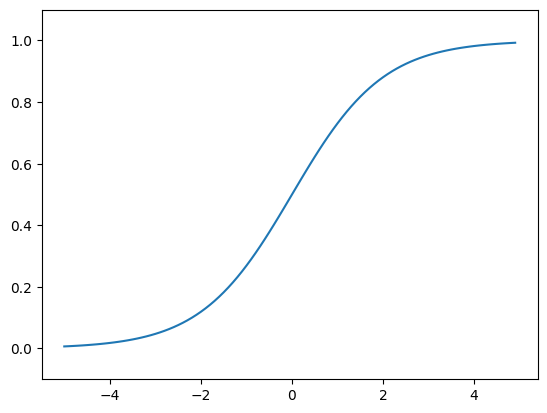

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)       # sigmoid() 함수로 변경
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축 범위 지정
plt.show()

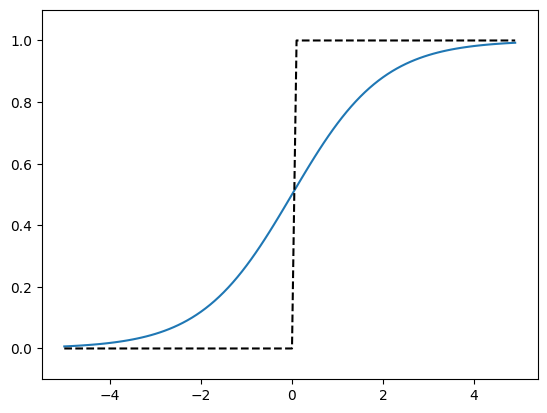

In [ ]:
# [그림 3-8] 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.7 ReLU 함수

In [ ]:
def relu(x):
    return np.maximum(0, x)

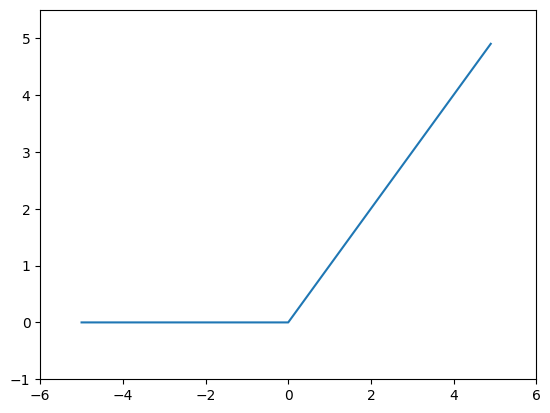

In [ ]:
# [그림 3-9] 그리기
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.xlim(-6, 6)    # x축 범위 지정
plt.ylim(-1, 5.5)  # y축 범위 지정
plt.show()

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [ ]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A)

1

In [ ]:
A.shape

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

### 3.3.2 행렬의 곱

In [ ]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [ ]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [ ]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [ ]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [ ]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [ ]:
A.shape

(2, 3)

In [ ]:
# 다음 코드는 주석을 풀어 실행하면 ValueError를 일으킵니다.
#np.dot(A, C)

# 결과: ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) ! = 2 (dim 0)

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [ ]:
B = np.array([7, 8])
B.shape

(2,)

In [ ]:
np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

In [ ]:
X = np.array([1, 2])
X.shape

(2,)

In [ ]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.2 각 층의 신호 전달 구현하기

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)  # (2, 3)

(2, 3)


In [ ]:
print(X.shape)   # (2,)

(2,)


In [ ]:
print(B1.shape)  # (3,)

(3,)


In [ ]:
A1 = np.dot(X, W1) + B1

In [ ]:
Z1 = sigmoid(A1)

print(A1)  # [0.3, 0.7, 1.1]

[0.3 0.7 1.1]


In [ ]:
print(Z1)  # [0.57444252, 0.66818777, 0.75026011]

[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)  # (3,)

(3,)


In [ ]:
print(W2.shape)  # (3, 2)

(3, 2)


In [ ]:
print(B2.shape)  # (2,)

(2,)


In [ ]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [ ]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # 혹은 Y = A3

### 3.4.3 구현 정리

In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [ ]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)  # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [ ]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)  # 지수 함수
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [ ]:
sum_exp_a = np.sum(exp_a)  # 지수 함수의 합
print(sum_exp_a)

74.1221542101633


In [ ]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산 (제대로 계산되지 않는다)

<ipython-input-55-7f17026ba816>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산 (제대로 계산되지 않는다)
<ipython-input-55-7f17026ba816>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))  # 소프트맥스 함수의 계산 (제대로 계산되지 않는다)


array([nan, nan, nan])

In [ ]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [ ]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)  # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

### 3.5.3 소프트맥스 함수의 특징

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

## 3.6 손글씨 숫자 인식

**[노트]** *이번 장의 코드는 책 본문이나 깃허브 예제 소스와 살짝 다릅니다. 책에서는 로컬에 있는 MNIST 데이터셋을 불러오도록 작성되어 있으나, 여기서는 텐서플로(케라스)의 mnist 모듈을 이용하여 데이터셋을 읽어 옵니다. 큰 차이가 없도록 최대한 밑단의 코드만 수정했습니다.*

***dataset/mnist.py***

In [ ]:
import urllib.request
import os
import os.path
import pickle
import numpy as np
import tensorflow as tf

mnist = tf.keras.datasets.mnist
save_file = os.getcwd() + "/mnist.pkl"

def _convert_numpy():
    dataset = {}

    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # 이미지 데이터 평탄화
    dataset['train_img'] = train_images.reshape(train_images.shape[0], -1)
    dataset['train_label'] = train_labels
    dataset['test_img'] = test_images.reshape(test_images.shape[0], -1)
    dataset['test_label'] = test_labels

    return dataset

def init_mnist():
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1

    return T


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기

    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label :
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다.

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()

    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])

    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

### 3.6.1 MNIST 데이터셋

In [ ]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


***ch03/mnist_show.py***

5
(784,)
(28, 28)


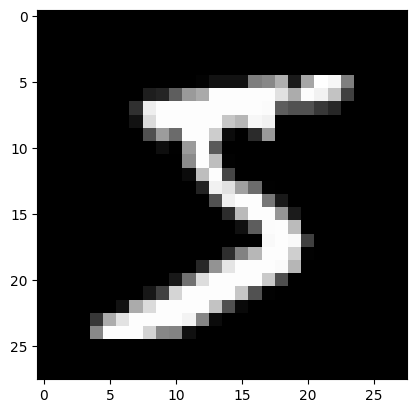

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

### 3.6.2 신경망의 추론 처리

***common/functions.py***

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)  # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

***ch03/neuralnet_mnist.py***

In [ ]:
import tensorflow as tf
import urllib.request
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    url = 'https://github.com/WegraLee/deep-learning-from-scratch/raw/refs/heads/master/ch03/sample_weight.pkl'
    urllib.request.urlretrieve(url, 'sample_weight.pkl')

    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


### 3.6.3 배치 처리

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape

(10000, 784)

In [ ]:
x[0].shape

(784,)

In [ ]:
W1.shape

(784, 50)

In [ ]:
W2.shape

(50, 100)

In [ ]:
W3.shape

(100, 10)

***ch03/neuralnet_mnist_batch.py***

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [ ]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(range(0, 10, 3))

[0, 3, 6, 9]

In [ ]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [ ]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)

[ True  True False  True]


In [ ]:
np.sum(y==t)

3